<a href="https://colab.research.google.com/github/Ljetulf/Neuronet-experiments/blob/master/Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

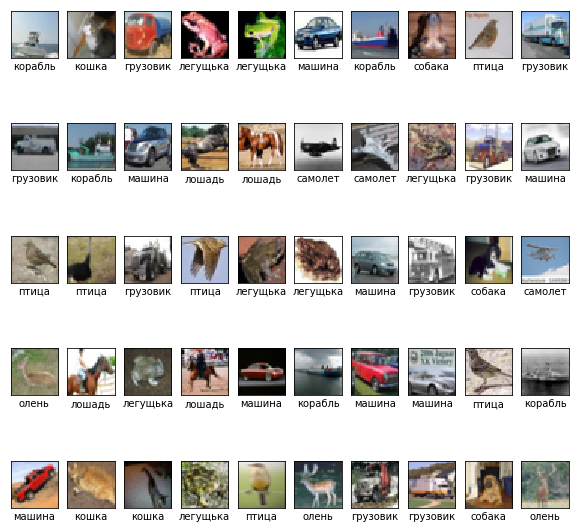

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
__________

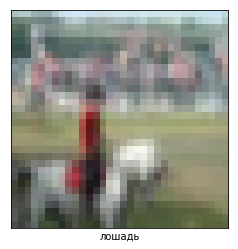

Ответ нейросети:  олень
Правильный ответ:  лошадь
Выбран элемент массива x_test под номером:  1195


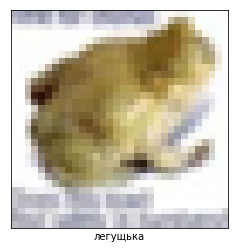

Ответ нейросети:  легущька
Правильный ответ:  легущька
Выбран элемент массива x_test под номером:  1787


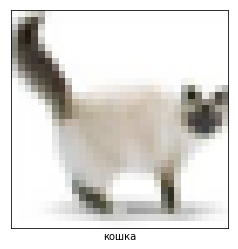

Ответ нейросети:  кошка
Правильный ответ:  кошка
Выбран элемент массива x_test под номером:  4413


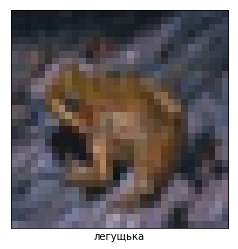

Ответ нейросети:  легущька
Правильный ответ:  легущька
Выбран элемент массива x_test под номером:  5082


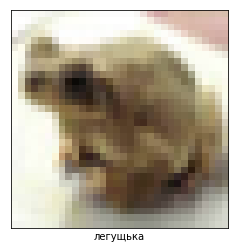

Ответ нейросети:  легущька
Правильный ответ:  легущька
Выбран элемент массива x_test под номером:  7691


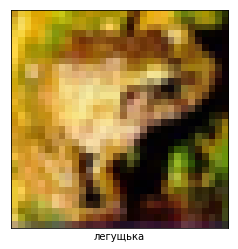

Ответ нейросети:  легущька
Правильный ответ:  легущька
Выбран элемент массива x_test под номером:  5518


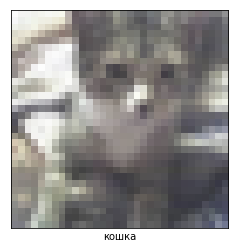

Ответ нейросети:  кошка
Правильный ответ:  кошка
Выбран элемент массива x_test под номером:  8212


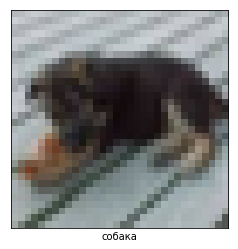

Ответ нейросети:  кошка
Правильный ответ:  собака
Выбран элемент массива x_test под номером:  820


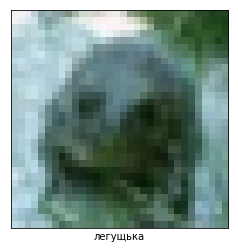

Ответ нейросети:  легущька
Правильный ответ:  легущька
Выбран элемент массива x_test под номером:  728


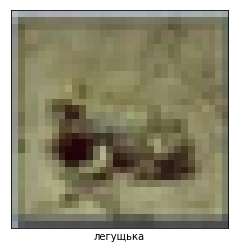

Ответ нейросети:  легущька
Правильный ответ:  легущька


In [15]:
import numpy as np
from keras.datasets import cifar10 #датасет
from keras.engine.sequential import Sequential #последовательная сеть
from keras.layers.core import Dense, Dropout, Flatten #полносвязная сеть, Dropout - метод, позволяющий выключать некоторые нейроны случайным образом в процессе обучения для избежания переобучения, Flatten - преобразует из двухмерного в одномерное представление
from keras.layers.convolutional import Conv2D, MaxPooling2D#сверточный слой и слой подвыборки
from keras import utils #утилиты
import matplotlib.pyplot as plt
import random as rnd

#загружаем данные из датасета
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #x_train - изображения для обучения, y_train - правильные ответы, x_test ,y_test - набор данных для тестирования
#определим названия классов
classes = ['самолет','машина','птица','кошка','олень','собака','легущька','лошадь','корабль','грузовик']
#посмотрим, что у нас дано в качестве примера
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[int(y_train[i])])
plt.show()
#преобразуем тип входных данных
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#нормализуем
x_train = x_train / 255 #делим интенсивность каждого пикселя на 255, то есть теперь эти данные в диапозоне от 0 до 1
x_test = x_test / 255
#правильные ответы - номер соответствующего класса от 0 до 10, нейросеть выдает 10 значений по количеству нейронов, которые соответствуют вероятности того, что объект принадлежит данному классу
y_train = utils.to_categorical(y_train, 10) #преобразуем метки выхода в категории, пример ниже (10 классов)
y_test = utils.to_categorical(y_test, 10)

#теперь создаем саму нейросеть(модель)
model = Sequential()

#добавляем слои(
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', input_shape = (32, 32, 3), activation = 'relu', data_format="channels_last"))#32 - количество карт признаков, 3, 3 - размер карты признаков, input_shape - размерность входных данных, где 3 - число каналов RGB, 32 x 32 - размерность изображения, padding - заполнение нулями оставшегося пространства
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))#слой подвыборки, пробегается по каждому квадрату 2 на 2 и находит максимальное и записывает в соответствующий элемент
model.add(Dropout(0.25))#слой регуляризации, выключает нейроны с вероятностью 25 процентов, чтобы нейроны не действовали друг на друга
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', activation = 'relu', data_format="channels_last"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', activation = 'relu', data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))#слой подвыборки, пробегается по каждому квадрату 2 на 2 и находит максимальное и записывает в соответствующий элемент
model.add(Dropout(0.25))
model.add(Flatten())#преобразование двумерного изображения в одномерное
model.add(Dropout(0.5))#теперь уже отключаем нейроны с вероятностью 50%
model.add(Dense(10, activation='softmax'))#выходной слой

#компилируем модель
model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
#loss - функция ошибки(в данном случае, категориальная перекрестная энтропия - хорошо подходит для задач классификации когда классов больше чем 2), optimiser - оптимизатор(SGD = стохастический градиентный спуск), metrics - метрика качества обучения сети(доля правильных ответов)
print(model.summary()) # печатаем параметры сети

#обучение
model.fit(x_train, y_train, batch_size = 32, epochs = 25, validation_split = 0.1, shuffle = True, verbose = 1)#validation split - часть наборя для обучения используется для проверки
#x_train - вход, y_train - выход, batch_size - размер минивыборки для метода градиентного спуска(то есть мы берем 200 изображений, рассчитываем функцию ошибки, потом расчитываем градиент и изменяем веса), epochs - сколько раз мы обучаем нейросеть на одном и том же наборе данных, verbose - позволяет печатать прогресс обучения нейросети, shuffle - в начале каждой эпохи перемешиваются данные для повышения качества обучения
#запускаем процесс оценки качества на тестовой выборке
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4))
#запускаем сеть на тестовых данных(10 случайных)
for i in range(1, 11):
  n_rec = rnd.randint(0, 10000)#элемент массива x_test
  print("Выбран элемент массива x_test под номером: ", n_rec)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[n_rec].reshape(32, 32, 3), cmap=plt.cm.binary)
  #показываем наше изображение для теста
  label = np.argmax(y_test[n_rec], axis = 0)#здесь мы находим максимальный элемент массива y_test и выводим его индекс, соответствующий номеру класса
  plt.xlabel(classes[label])
  plt.show()
  testone = x_test[n_rec]
  testone = np.expand_dims(testone, axis = 0)#нормализуем изображение
  prediction = model.predict(testone)
  prediction = np.argmax(prediction[0])#здесь мы находим максимальный элемент массива prediction и выводим его индекс, соответствующий номеру класса
  print("Ответ нейросети: ", classes[prediction])
  label = np.argmax(y_test[n_rec], axis = 0)
  print("Правильный ответ: ", classes[label])
#переобучение наступает, когда val_acc начинает падать, это значит, что нейросеть учится распознавать только элементы конкретной выборки, а не общие особенности
#все параметры выбраны оптимальными экспериментально

# New Section